# Sheet

In [8]:
import pandas as pd

In [9]:
try:
    data = pd.read_csv('spam.csv')
except UnicodeDecodeError:
    data = pd.read_csv('spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN
3396,ham,Heehee that was so funny tho,NaN,NaN,NaN
1930,ham,Carry on not disturbing both of you,NaN,NaN,NaN
3038,ham,"Wishing you and your family Merry \X\"" mas and...",NaN,NaN,NaN
3966,spam,YOU HAVE WON! As a valued Vodafone customer ou...,NaN,NaN,NaN


In [11]:
data.shape

(5572, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:

if {'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}.issubset(data.columns):
    data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

data.sample(5)

,v1,v2
5254,ham,I didnt get anything da
230,ham,Get down in gandhipuram and walk to cross cut ...
4239,ham,The LAY MAN! Just to let you know you are miss...
172,ham,What time you coming down later?
3963,ham,"If e timing can, then i go w u lor..."


In [19]:
#Rename data
data.rename({'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,v1,v2
4271,ham,Where to get those?
1091,ham,Please da call me any mistake from my side sor...
776,ham,Why don't you go tell your friend you're not s...
5269,spam,"If you don't, your prize will go to another cu..."
2147,ham,Ok. Can be later showing around 8-8:30 if you ...


In [24]:

#convert categorical data
from sklearn.preprocessing import LabelEncoder

# Create the encoder instance
encoder = LabelEncoder()

# Rename and confirm columns before proceeding further
data.columns = ['target','text']
data.sample(5)

# Apply encoding
data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.isnull().sum()

target 0
text 0
dtype: int64

In [26]:
data.duplicated().sum()

403

In [27]:
#removing duplicates
data=data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [28]:
data.shape

(5169, 2)

In [29]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data['target'].value_counts()

0 4516
1 653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd3debda2b0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

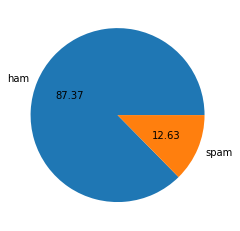

In [31]:

import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")

In [32]:
data.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<ipython-input-38-3ba3d2209591>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


<Axes: xlabel='num_characters', ylabel='Count'>

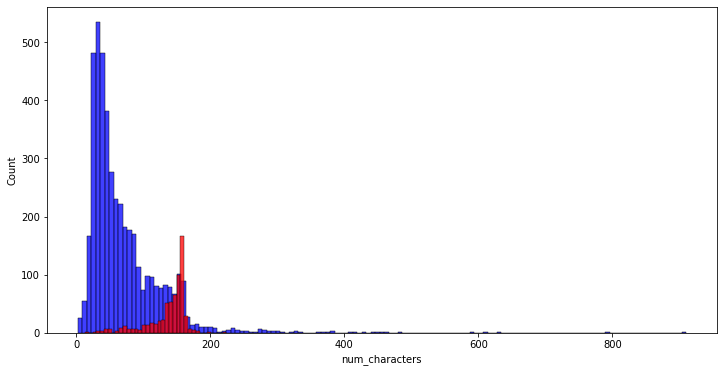

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt  

# Create new column 'num_characters' representing the length of each text message
data['num_characters'] = data['text'].apply(len)

plt.figure(figsize=(12, 6))

# Call seaborn's histplot function on the data where the target is 0 and plot 'num_characters'
sns.histplot(data[data['target'] == 0]['num_characters'], color='blue')

# Call seaborn's histplot function on the data where the target is 1 and plot 'num_characters'
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')

<ipython-input-42-25e0f95866fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['text'].apply(lambda x: len(str(x).split()))


<Axes: xlabel='num_words', ylabel='Count'>

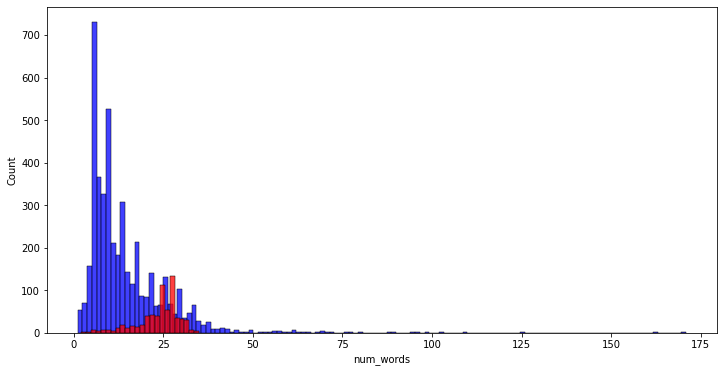

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt  

# Create new 'num_words' column representing the number of words in each text message
data['num_words'] = data['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))

# Call seaborn's histplot function on the data where the target is 0 and plot 'num_words'
sns.histplot(data[data['target'] == 0]['num_words'], color='blue')

# Call seaborn's histplot function on the data where the target is 1 and plot 'num_words'
sns.histplot(data[data['target'] == 1]['num_words'], color='red')

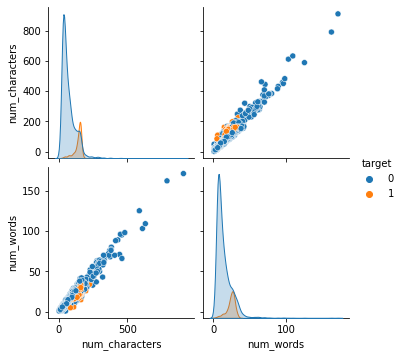

In [43]:
sns.pairplot(data,hue='target')

# Sheet 2